## TÍTULO

## **Dormir Mejor con Datos: Machine Learning para Detectar Trastornos del Sueño**

### TEMA

Este proyecto tiene como finalidad analizar cómo los hábitos de vida y factores de salud influyen en la calidad del sueño. Para ello, se han utilizado dos conjuntos de datos obtenidos de Kaggle, los cuales recopilan información sobre comportamientos diarios, condiciones médicas, niveles de estrés y patrones de sueño. A través de técnicas de análisis exploratorio de datos (EDA) y algoritmos de aprendizaje automático, se busca identificar patrones significativos y construir un modelo predictivo capaz de detectar posibles trastornos del sueño. El objetivo final es obtener conocimientos que permitan recomendar cambios personalizados en el estilo de vida para mejorar la salud del descanso.

### Variable Objetivo (Target)
**El objetivo principal de este proyecto es predecir si una persona presenta algún tipo de trastorno del sueño, representado en la variable Sleep_Disorder.**
- **Tipo de predicción** Se trata de un problema de clasificación, en el que el modelo determinará si una persona tiene o no tiene un trastorno del sueño, y en caso afirmativo, de qué tipo (como insomnio, apnea del sueño, narcolepsia, etc.).
- **Relevancia médica y social** Anticipar este tipo de condiciones tiene un gran valor, ya que permite intervenir de forma temprana, reducir riesgos asociados y mejorar la calidad de vida.
- **Aplicabilidad práctica** El modelo puede entregar recomendaciones concretas del tipo “esta persona probablemente tiene insomnio o apnea del sueño”, lo cual puede ser útil para clínicas, médicos o herramientas de autocuidado.


### Objetivos

- **Identificar los factores más influyentes y ayudar a mejorar hábitos para dormir mejor**
- **Analizar los hábitos de sueño:** Identificar patrones comunes de duración y calidad del sueño entre diferentes grupos demográficos (edad, ocupación, género).
- **Explorar la relación entre estilo de vida y salud del sueño:** Evaluar cómo factores como el estrés, la actividad física, el consumo de alcohol o cafeína influyen en la calidad y duración del sueño.
- **Predecir problemas de sueño:** Desarrollar modelos de aprendizaje automático que permitan predecir condiciones como la apnea del sueño o los ronquidos, a partir de variables de estilo de vida y salud.
- **Clasificar la calidad del sueño:** Utilizar técnicas de clasificación para categorizar a los individuos según su nivel de calidad de sueño (bueno, regular, malo).
- **Generar recomendaciones personalizadas:** Proponer sugerencias de mejora en los hábitos diarios basadas en los datos individuales y predicciones del modelo.

### Carga de librerias necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### Obtención de lo datos
- Dataset sobre lifestyle y sleep health
- https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
----
- Dataset sobre Sleep_disorder:
- https://www.kaggle.com/datasets/ziya07/sleep-disorder-diagnostic-dataset


###  Carga y exploración inicial del dataset

In [2]:
df = pd.read_csv('../data/sleep_health.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df = pd.read_csv('../data/sleep_disorder.csv')
df

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1
...,...,...,...,...,...,...,...,...
995,P0996,23,Female,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1
996,P0997,49,Female,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1
997,P0998,75,Male,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1
998,P0999,55,Female,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1


In [4]:
# Ver los tipos únicos de trastornos del sueño en la columna Sleep_Disorder_Type
unique_disorders = df['Sleep_Disorder_Type'].unique()
print("Tipos de trastornos del sueño:", unique_disorders)

Tipos de trastornos del sueño: ['Restless Leg Syndrome' 'Insomnia' 'Narcolepsy' 'Obstructive Sleep Apnea'
 'No Disorder']



#### Explicación de Tipos de trastornos
- Restless Leg Syndrome → Síndrome de Piernas Inquietas. Trastorno neurológico caracterizado por una necesidad incontrolable de mover las piernas, especialmente por la noche.
- Insomnia → Insomnio. Dificultad para conciliar el sueño, permanecer dormido o despertarse demasiado temprano y no poder volver a dormir.
- Narcolepsy → Narcolepsia. Trastorno del sueño que provoca somnolencia extrema durante el día y episodios súbitos de sueño.
- Obstructive Sleep Apnea → Apnea Obstructiva del Sueño. Trastorno en el que la respiración se interrumpe repetidamente durante el sueño debido a una obstrucción de las vías respiratorias.
- No Disorder → Sin Trastorno. Pacientes que no presentan ningún trastorno del sueño diagnosticado.
---

### Descripción columnas de los DataSets

#### DataSet sobre sleep_health
- **Person ID**	Identificador único de cada persona.
- **Gender**	Género de la persona (Male o Female).
- **Age**	Edad de la persona.
- **Occupation**	Profesión u ocupación de la persona.
- **Sleep Duration**	Duración promedio del sueño en horas.
- **Quality of Sleep**	Calidad del sueño (escala numérica, posiblemente de 1 a 10).
- **Physical Activity Level**	Nivel de actividad física (valor numérico, posiblemente en minutos o una escala).
- **Stress Level**	Nivel de estrés percibido (escala numérica).
- **MI Category**	Categoría de Índice de Masa Corporal (Underweight, Normal, Overweight, Obese).
- **Blood Pressure**	Presión arterial (formato: sistólica/diastólica).
- **Heart Rate**	Frecuencia cardíaca en reposo (latidos por minuto).
- **Daily Steps**	Número promedio de pasos diarios.
- **Sleep Disorder**	Tipo de trastorno del sueño diagnosticado (None, Insomnia, Sleep Apnea, etc.).
---
#### DataSet sobre sleep_disorder
- **Patient_ID**	Identificador único de cada persona.
- **Age**	Edad del paciente (en años).
- **Gender**	Género de la persona (Male o Female).
- **Sleep_Disorder_Type** Diagnóstico del trastorno del sueño del paciente (categórico, con varias categorías como Apnea del Sueño, Insomnio, Narcolepsia, etc.).
- **AHI_Score** Puntaje del índice Apnea-Hipopnea del paciente (numérico).
- **SaO2_Level** Nivel de saturación de oxígeno en sangre del paciente (numérico).
- **OCR_Extracted_Text** Texto extraído mediante OCR de los documentos médicos escaneados (texto).
- **Diagnosis_Confirmed** Columna binaria que indica si el diagnóstico de trastorno del sueño está confirmado (1 para confirmado, 0 para no confirmado).


### Fusionar los 2 dataset

In [5]:
# Cargar los datasets
df1 = pd.read_csv('../data/sleep_health.csv')
df2 = pd.read_csv('../data/sleep_disorder.csv')

# Añadir columna para identificar el origen de los datos
df1['source'] = 'sleep_health'
df2['source'] = 'sleep_disorder'

# Combinar datasets con columnas completas (outer join por columnas)
df_combined = pd.concat([df1, df2], ignore_index=True, sort=False)

# Mostrar forma final
print(f"Dataset combinado tiene {df_combined.shape[0]} filas y {df_combined.shape[1]} columnas.")
df_combined


Dataset combinado tiene 1374 filas y 20 columnas.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,source,Patient_ID,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,1.0,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200.0,NaN,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,NaN,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,NaN,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,NaN,Female,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0996,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1.0
1370,NaN,Female,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0997,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1.0
1371,NaN,Male,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0998,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1.0
1372,NaN,Female,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0999,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1.0


In [6]:
df_combined.isnull().sum()


Person ID                  1000
Gender                        0
Age                           0
Occupation                 1000
Sleep Duration             1000
Quality of Sleep           1000
Physical Activity Level    1000
Stress Level               1000
BMI Category               1000
Blood Pressure             1000
Heart Rate                 1000
Daily Steps                1000
Sleep Disorder             1219
source                        0
Patient_ID                  374
Sleep_Disorder_Type         374
AHI_Score                   374
SaO2_Level                  374
OCR_Extracted_Text          374
Diagnosis_Confirmed         374
dtype: int64

In [7]:
# Ver resumen general
df_combined.info()

# Ver un resumen estadístico
df_combined.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    float64
 1   Gender                   1374 non-null   object 
 2   Age                      1374 non-null   int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    float64
 6   Physical Activity Level  374 non-null    float64
 7   Stress Level             374 non-null    float64
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    float64
 11  Daily Steps              374 non-null    float64
 12  Sleep Disorder           155 non-null    object 
 13  source                   1374 non-null   object 
 14  Patient_ID              

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,source,Patient_ID,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
count,374.000000,1374,1374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155,1374,1000,1000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2,2,1000,5,NaN,NaN,1000,NaN
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea,sleep_disorder,P1000,Obstructive Sleep Apnea,NaN,NaN,Patient P1000 diagnosed with Restless Leg Synd...,NaN
freq,NaN,697,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78,1000,1,309,NaN,NaN,1,NaN
mean,187.500000,NaN,40.951237,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN,NaN,NaN,NaN,25.715150,87.482860,NaN,0.884000
std,108.108742,NaN,19.864540,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN,NaN,NaN,NaN,14.324888,7.179349,NaN,0.320385
min,1.000000,NaN,3.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN,NaN,NaN,NaN,0.020000,75.000000,NaN,0.000000
25%,94.250000,NaN,28.000000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN,NaN,NaN,NaN,13.450000,81.335000,NaN,1.000000
50%,187.500000,NaN,41.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN,NaN,NaN,NaN,26.395000,87.610000,NaN,1.000000
75%,280.750000,NaN,55.750000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN,NaN,NaN,NaN,38.105000,93.790000,NaN,1.000000


In [8]:
# Convertir sólo columnas específicas a category
cols_to_convert = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for col in cols_to_convert:
    df_combined[col] = df_combined[col].astype('category')



In [9]:
print(df_combined)

      Person ID  Gender  Age            Occupation  Sleep Duration  \
0           1.0    Male   27     Software Engineer             6.1   
1           2.0    Male   28                Doctor             6.2   
2           3.0    Male   28                Doctor             6.2   
3           4.0    Male   28  Sales Representative             5.9   
4           5.0    Male   28  Sales Representative             5.9   
...         ...     ...  ...                   ...             ...   
1369        NaN  Female   23                   NaN             NaN   
1370        NaN  Female   49                   NaN             NaN   
1371        NaN    Male   75                   NaN             NaN   
1372        NaN  Female   55                   NaN             NaN   
1373        NaN  Female   11                   NaN             NaN   

      Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                  6.0                     42.0           6.0   Overweight   
1  

In [10]:
df_combined.dtypes  # Confirmar los nuevos tipos


Person ID                   float64
Gender                     category
Age                           int64
Occupation                 category
Sleep Duration              float64
Quality of Sleep            float64
Physical Activity Level     float64
Stress Level                float64
BMI Category               category
Blood Pressure             category
Heart Rate                  float64
Daily Steps                 float64
Sleep Disorder             category
source                       object
Patient_ID                   object
Sleep_Disorder_Type          object
AHI_Score                   float64
SaO2_Level                  float64
OCR_Extracted_Text           object
Diagnosis_Confirmed         float64
dtype: object

### Fusionar columna Sleep Disorder y Sleep Disorder Type

In [11]:
# Crear una nueva columna 'Sleep_Disorder' que use primero una y, si es NaN, la otra
df_combined['Sleep_Disorder'] = df_combined['Sleep Disorder'].combine_first(df_combined['Sleep_Disorder_Type'])

In [12]:
# Elimino las columnas originales, ya no las necesito
df_combined.drop(['Sleep Disorder', 'Sleep_Disorder_Type'], axis=1, inplace=True)


### Eliminación de columnas que no necesito

In [13]:
# Eliminar columna Person ID', 'Patient_ID', 'source'
df_combined.drop(['Person ID', 'Patient_ID', 'source'], axis=1, inplace=True)

In [14]:
# OCR_Extracted_Text  texto libre extraído de documentos médicos escaneados.
# Necesita NPL para su análisis (Procesamiento de lenguaje natural) 
df_combined.drop('OCR_Extracted_Text', axis=1, inplace=True)

In [15]:
# Diagnosis_Confirmed es una variable booleana que indica si el diagnóstico ha sido confirmado por un médico.
# Se elimina porque puede tener una alta correlación con la variable objetivo 'Sleep_Disorder' 
# (por ejemplo, todos los casos con trastorno ≠ "No Disorder" suelen tener Diagnosis_Confirmed = 1).
# Además, al haber fusionado dos datasets diferentes, podrían existir trastornos en uno de ellos 
# que no estén representados en el otro, lo que podría introducir inconsistencias o sesgos si se mantiene esta columna.
df_combined.drop('Diagnosis_Confirmed', axis=1, inplace=True)

### Columnas de las que tengo dudas

In [16]:
# Duda en eliminar filas con valores NaN en AHI_Score y SaO2_Level
# ya que pueden ser relevantes para el diagnóstico de trastornos del sueño.
# AHI_Score es un índice que mide la gravedad de los trastornos del sueño,
# y SaO2_Level mide la saturación de oxígeno en sangre durante el sueño.

# Saco el porcentaje
print(df_combined['AHI_Score'].isna().mean() * 100)
print(df_combined['SaO2_Level'].isna().mean() * 100)


27.219796215429405
27.219796215429405


In [17]:
# Como el porcentaje es del 27% aporximadamente, usaré la mediana para rellenar los NaN.
# Es más robusta frente a outliers.
# Mantiene mejor la forma de la distribución si hay asimetría.
df_combined['AHI_Score'].fillna(df_combined['AHI_Score'].median(), inplace=True)
df_combined['SaO2_Level'].fillna(df_combined['SaO2_Level'].median(), inplace=True)


#### Elimar las filas que tiene nulos de la columna Sleep_Disorder 

In [18]:
df_combined.dropna(subset=['Sleep_Disorder'], inplace=True)


### Limpiar datos columna con nulos

In [19]:
# Columnas numéricas a imputar con MEDIANA
num_cols = [
    'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps'
]

# Crear flag de imputación. Ayuda al modelo a identificar qué valores fueron imputados,
# por si existen patrones distintos en esos casos.
for col in num_cols:
    df_combined[f'{col}_Imputed'] = df_combined[col].isnull().astype(int)
    df_combined[col].fillna(df_combined[col].median(), inplace=True)

# Columnas categóricas a imputar con MODA
cat_cols = ['BMI Category', 'Blood Pressure']

for col in cat_cols:
    df_combined[f'{col}_Imputed'] = df_combined[col].isnull().astype(int)
    df_combined[col].fillna(df_combined[col].mode()[0], inplace=True)

# === Verificación final
print("Valores nulos restantes después de imputación:")
print(df_combined[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                   'Stress Level', 'Heart Rate', 'Daily Steps',
                   'BMI Category', 'Blood Pressure']].isnull().sum())



Valores nulos restantes después de imputación:
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
BMI Category               0
Blood Pressure             0
dtype: int64


In [20]:
# aplicar la moda a la columna 'Occupation'
# para rellenar los valores NaN, ya que podria ser importante para el modelo.
# La ocupación puede influir en los trastornos del sueño,
# y la moda es una buena opción para imputar valores faltantes en variables categóricas.
df_combined['Occupation'].fillna(df_combined['Occupation'].mode()[0], inplace=True)


### Comprobación del dataset después de eliminar los nulos y las columans que no necesitamos

In [21]:
df_combined

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,...,SaO2_Level,Sleep_Disorder,Sleep Duration_Imputed,Quality of Sleep_Imputed,Physical Activity Level_Imputed,Stress Level_Imputed,Heart Rate_Imputed,Daily Steps_Imputed,BMI Category_Imputed,Blood Pressure_Imputed
3,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,...,87.61,Sleep Apnea,0,0,0,0,0,0,0,0
4,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,...,87.61,Sleep Apnea,0,0,0,0,0,0,0,0
5,Male,28,Software Engineer,5.9,4.0,30.0,8.0,Obese,140/90,85.0,...,87.61,Insomnia,0,0,0,0,0,0,0,0
6,Male,29,Teacher,6.3,6.0,40.0,7.0,Obese,140/90,82.0,...,87.61,Insomnia,0,0,0,0,0,0,0,0
16,Female,29,Nurse,6.5,5.0,40.0,7.0,Normal Weight,132/87,80.0,...,87.61,Sleep Apnea,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Female,23,Nurse,6.5,7.0,45.0,7.0,Overweight,140/95,72.0,...,83.14,Insomnia,1,1,1,1,1,1,1,1
1370,Female,49,Nurse,6.5,7.0,45.0,7.0,Overweight,140/95,72.0,...,84.85,No Disorder,1,1,1,1,1,1,1,1
1371,Male,75,Nurse,6.5,7.0,45.0,7.0,Overweight,140/95,72.0,...,90.08,Obstructive Sleep Apnea,1,1,1,1,1,1,1,1
1372,Female,55,Nurse,6.5,7.0,45.0,7.0,Overweight,140/95,72.0,...,95.04,Insomnia,1,1,1,1,1,1,1,1


In [22]:
# Comprobamos cuantos valores nulos nos siguen quedando
df_combined.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
BMI Category                       0
Blood Pressure                     0
Heart Rate                         0
Daily Steps                        0
AHI_Score                          0
SaO2_Level                         0
Sleep_Disorder                     0
Sleep Duration_Imputed             0
Quality of Sleep_Imputed           0
Physical Activity Level_Imputed    0
Stress Level_Imputed               0
Heart Rate_Imputed                 0
Daily Steps_Imputed                0
BMI Category_Imputed               0
Blood Pressure_Imputed             0
dtype: int64

-------

 ### Análisis Univariante



In [23]:
# Seleccionar columnas numéricas
num_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns

# Estadísticas básicas
print(df_combined[num_cols].describe())



               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  1155.000000     1155.000000       1155.000000              1155.000000   
mean     41.314286        6.541905          6.982684                47.133333   
std      21.379482        0.301975          0.490511                 9.284707   
min       3.000000        5.800000          4.000000                30.000000   
25%      24.000000        6.500000          7.000000                45.000000   
50%      43.000000        6.500000          7.000000                45.000000   
75%      59.000000        6.500000          7.000000                45.000000   
max      80.000000        8.300000          9.000000                90.000000   

       Stress Level   Heart Rate   Daily Steps    AHI_Score   SaO2_Level  \
count   1155.000000  1155.000000   1155.000000  1155.000000  1155.000000   
mean       6.834632    71.971429   6102.770563    25.806385    87.499922   
std        0.826036     1.896375    739.50

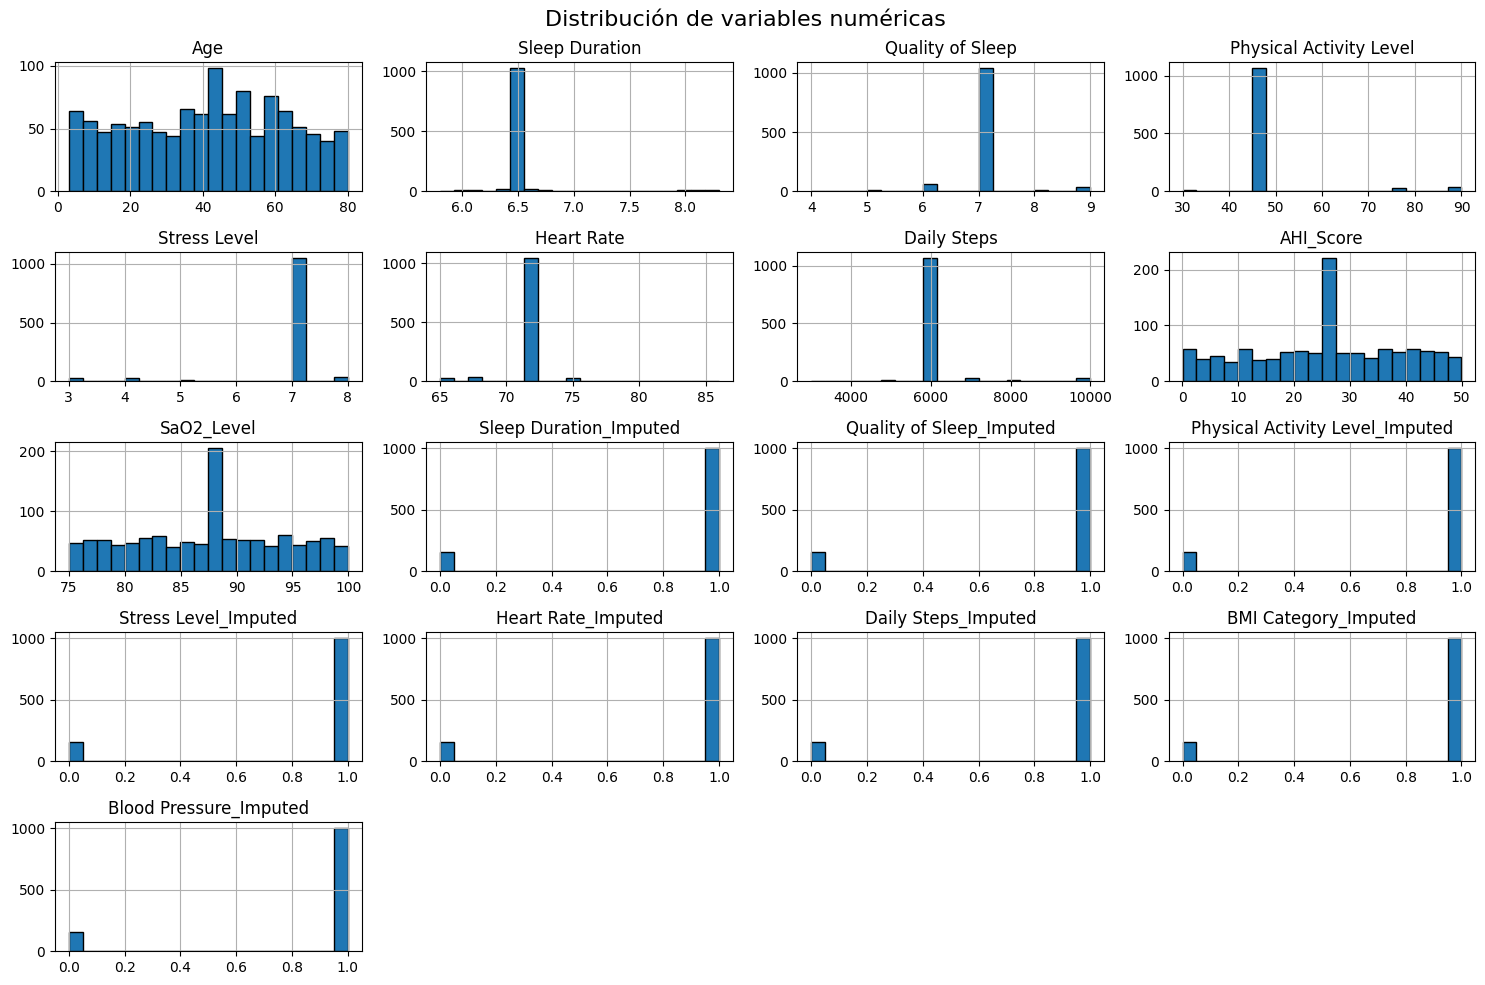

In [24]:
# Histograma para todas las numéricas
df_combined[num_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

##### ¿Qué datos podemos obtener de aquí?

- Edad: Bien repartida entre ~10 y 80 años, sin sesgos marcados.
- Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps. Cada una aparece casi constante (un único valor) en la gran mayoría de registros. Significa que para >85 %–90 % de los casos esos campos fueron imputados con la misma media/mediana, y solo un pequeño puñado de datos originales permanece.
- AHI_Score. Distribución real entre 0–50, bastante uniforme: estos datos no se imputaron (o tuvieron muy baja imputation).
- SaO₂_Level. Varía entre 75–100 %, con un ligero pico entre 85–95 %: también es una variable con datos mayoritariamente originales.

- Conclusión:
    - Sólo Edad, AHI_Score y SaO₂_Level conservan suficiente variabilidad real.
    - El resto de las variables numéricas están casi totalmente rellenas con un único valor imputado, lo que limita su utilidad para análisis y modelado.

---

#### Histograma y Boxplot

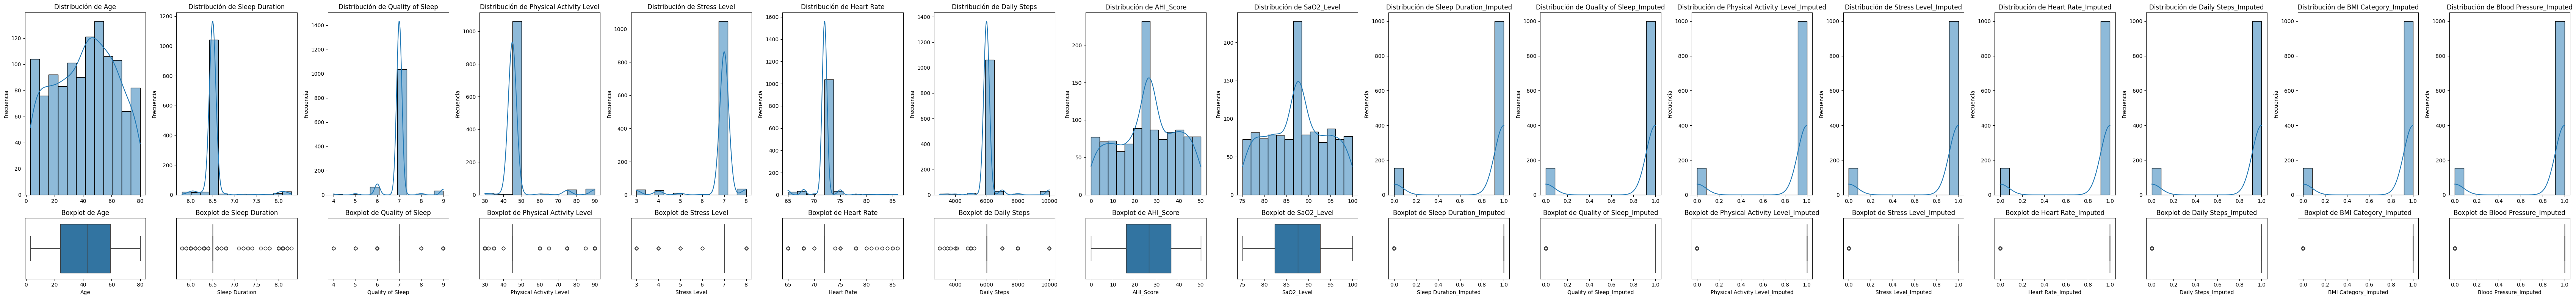

In [25]:
# Selección de variables numéricas
num_cols = df_combined.select_dtypes(include='number').columns
n = len(num_cols)

# Creamos una figura con 2 filas (hist+KDE / boxplot) y n columnas
fig, axes = plt.subplots(
    nrows=2,
    ncols=n,
    figsize=(4 * n, 8),
    gridspec_kw={'height_ratios': [3, 1]}
)

# Iteramos sobre cada variable y su par de ejes
for idx, col in enumerate(num_cols):
    # Histograma + KDE en la fila superior
    sns.histplot(
        df_combined[col],
        kde=True,
        ax=axes[0, idx]
    )
    axes[0, idx].set_title(f'Distribución de {col}')
    axes[0, idx].set_xlabel('')
    axes[0, idx].set_ylabel('Frecuencia')

    # Boxplot en la fila inferior
    sns.boxplot(
        x=df_combined[col],
        ax=axes[1, idx]
    )
    axes[1, idx].set_title(f'Boxplot de {col}')
    axes[1, idx].set_xlabel(col)
    axes[1, idx].set_yticks([])  

# Ajuste de márgenes y visualización
plt.tight_layout()
plt.show()

---

### Análisis Bivariante

#### Matriz de Correlación

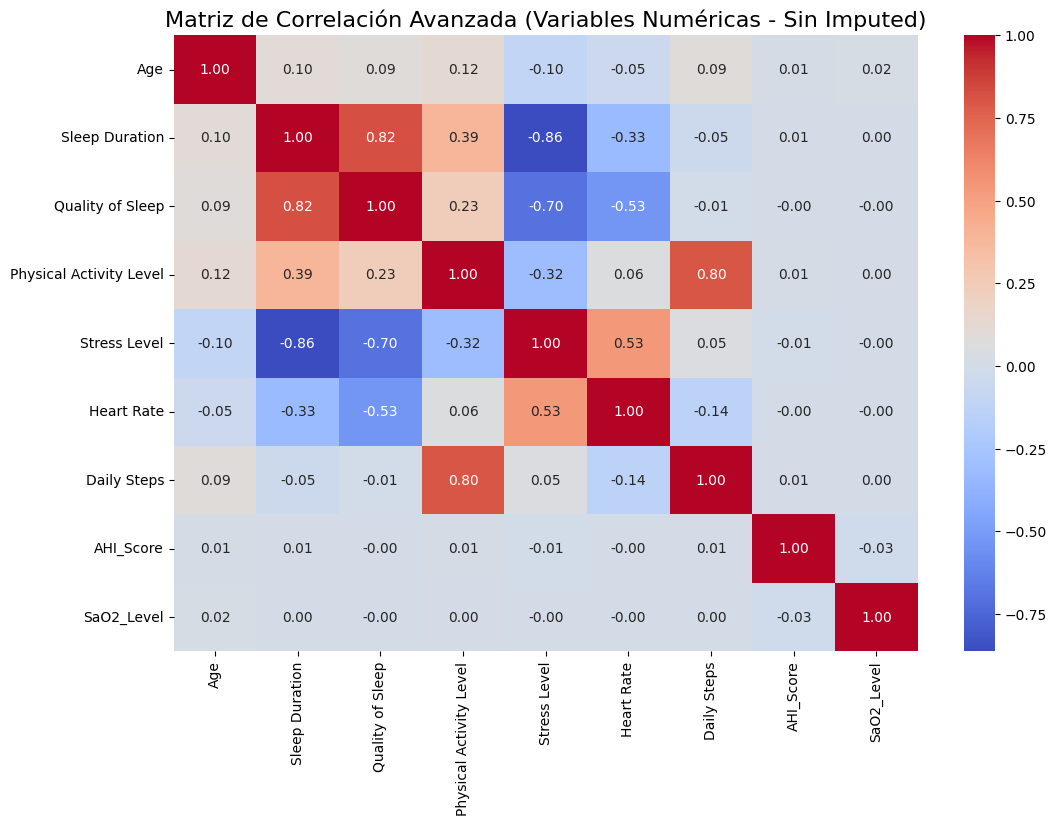

In [26]:
# Filtrar columnas que no contienen "Imputed"
filtered_num_cols = [col for col in num_cols if "Imputed" not in col]

# Calcular la matriz de correlación con las columnas filtradas
correlation_matrix = df_combined[filtered_num_cols].corr()

# Crear un mapa de calor con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación Avanzada (Variables Numéricas - Sin Imputed)", fontsize=16)
plt.show()

#### ¿Qué datos tenemos?
- Sueño - Calidad: muy fuerte (r≈+0.82) – más horas = mejor calidad.
- Estrés - Sueño: muy negativa con duración (r≈–0.86) y calidad (r≈–0.70); positiva con frecuencia cardíaca (r≈+0.53).
- Actividad - Pasos: muy alta (r≈+0.80); relación moderada con sueño (r≈+0.39 duración, r≈+0.23 calidad).
- Edad, AHI Score y SaO₂: casi nulas (|r|<0.12), aportan info independiente.

---

### Multivariante

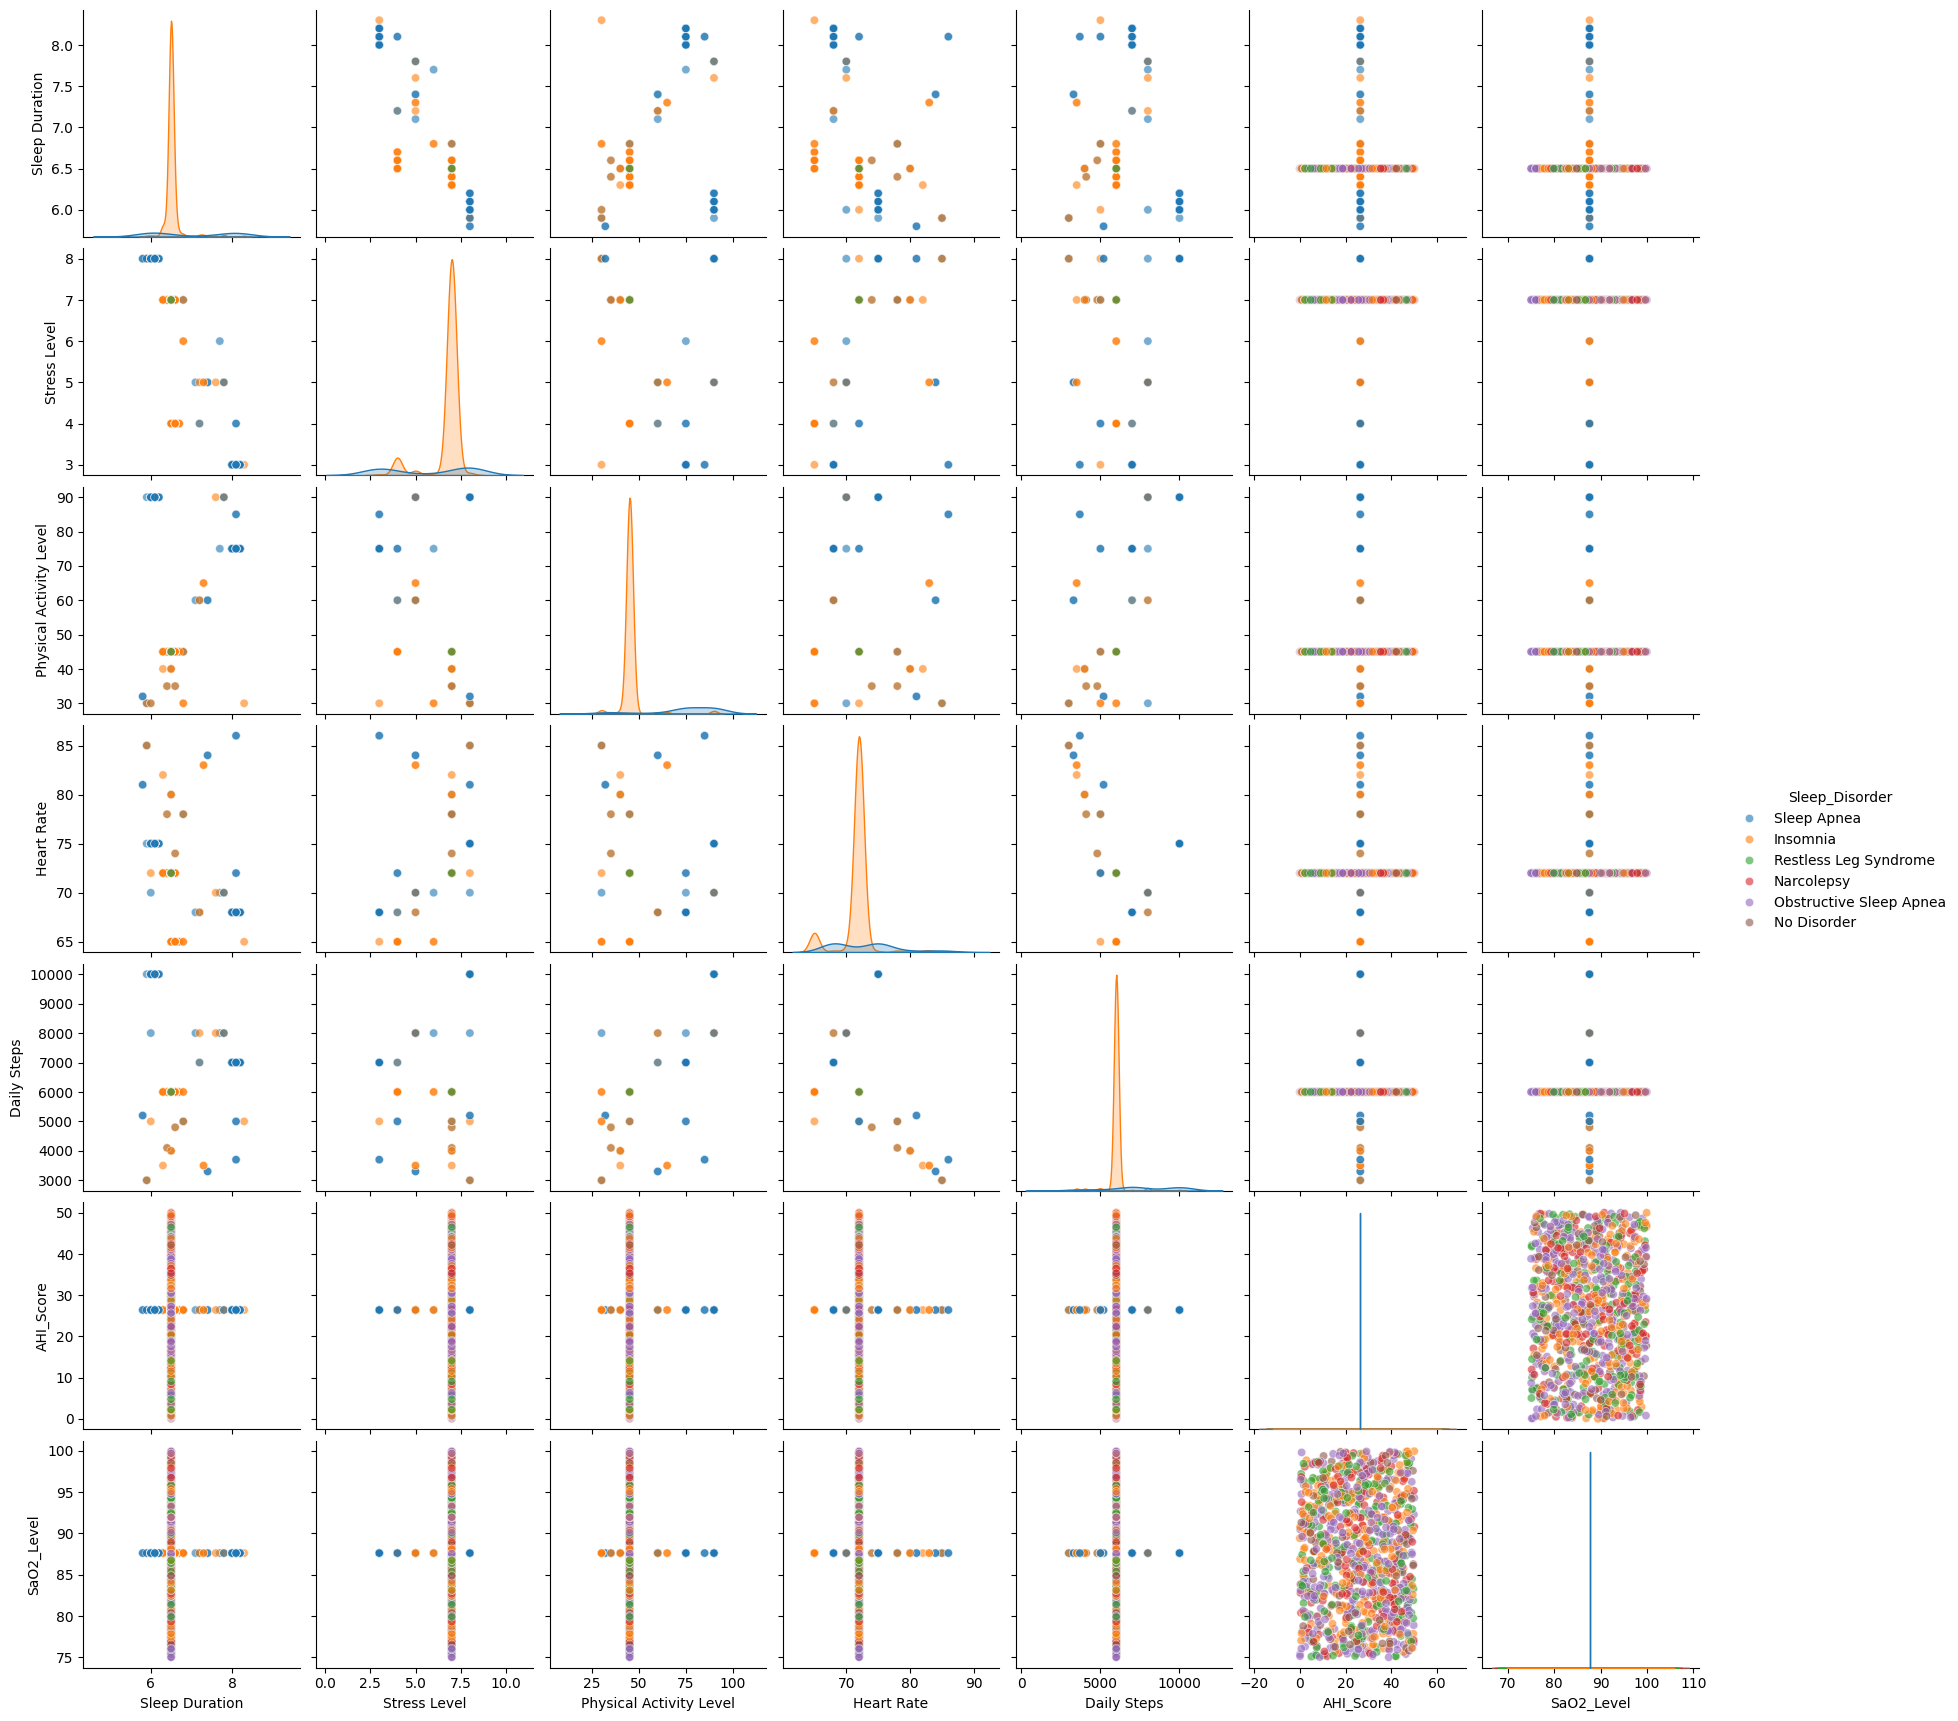

In [27]:

# Seleccionar algunas variables relevantes (para no saturar el gráfico)
cols_to_plot = ['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'AHI_Score', 'SaO2_Level', 'Sleep_Disorder']

# Filtrar dataset con solo esas columnas
subset = df_combined[cols_to_plot].dropna()

# Pairplot
sns.pairplot(subset, hue='Sleep_Disorder', diag_kind='kde', plot_kws={'alpha': 0.6})


#### ¿Qué vemos en este Pairplot?
- Sueño y estrés: Menos horas de sueño van de la mano con niveles de estrés altos, especialmente en personas con insomnio.
- Actividad física: Hay correlación fuerte entre minutos de ejercicio y pasos diarios, pero su relación con la duración del sueño es débil.
- Apnea vs resto: Los casos de apnea muestran AHI Score elevado (>20) y saturación de oxígeno ligeramente menor, mientras que los sanos duermen 7–8 h con estrés medio (4–6) y saturación alta (90–92 %).

----